In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error



rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['lines.linewidth'] = 2.5

In [40]:
df = pd.read_csv('data/GOOGL.csv')
df.head()

,Date,Close
0,4/27/2020,1270.859985
1,4/28/2020,1232.589966
2,4/29/2020,1342.180054
3,4/30/2020,1346.699951
4,5/1/2020,1317.319946


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    253 non-null    object 
 1   Close   253 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [42]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [43]:
df.head()

,Close
Date,
2020-04-27,1270.859985
2020-04-28,1232.589966
2020-04-29,1342.180054
2020-04-30,1346.699951
2020-05-01,1317.319946


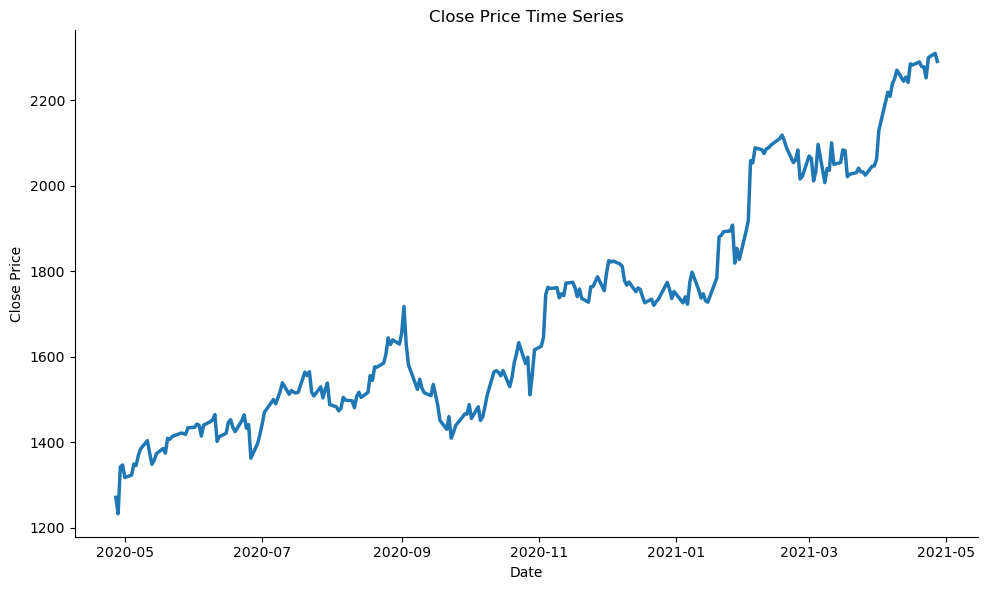

In [44]:
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'])
plt.title('Close Price Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.tight_layout()
plt.show()

# Test For Stationarity

In [45]:
GOOGL_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

ADF Statistic: 0.16025048664771283
p-value: 0.9699419435913057


In [46]:
diff_close = np.diff(df['Close'], n=1)

In [47]:
GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

ADF Statistic: -5.303439704295231
p-value: 5.386530961454658e-06


# ACF Plot

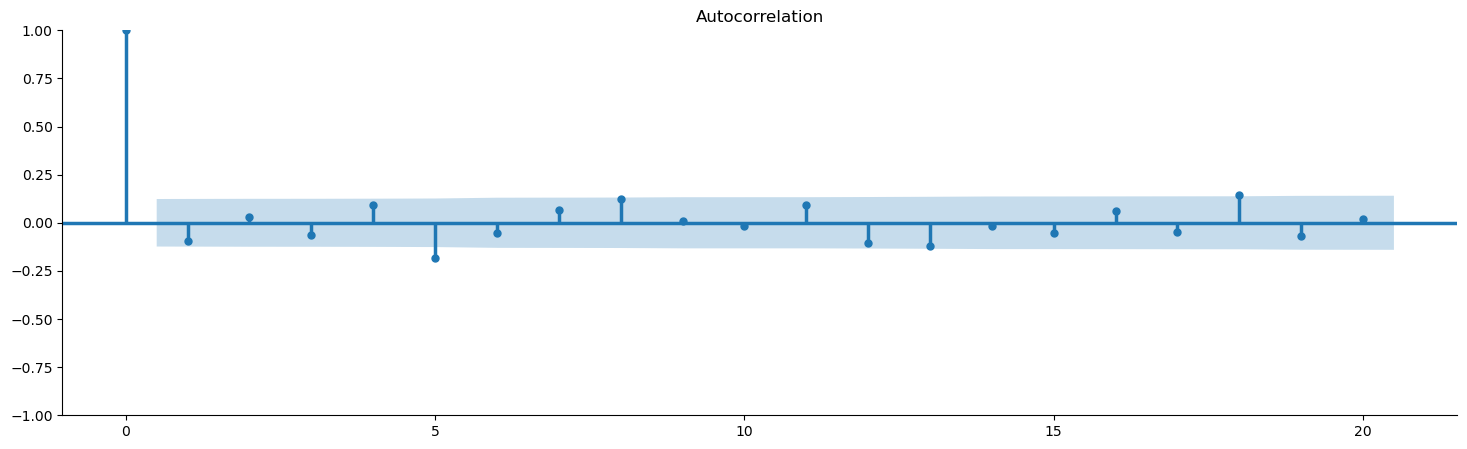

In [48]:
plot_acf(diff_close, lags=20);
